In [1]:
from RTER import RegressionTree
from distribution import TestDistribution
import numpy as np


from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from time import time


In [2]:
density=TestDistribution(15,1).returnDistribution()
np.random.seed(2)
#X_train,pdf_X_train=density.generate(1000)
X_train= np.arange(0,1,0.001).reshape(-1,1)
Y_train_true = np.sin(X_train).ravel()
Y_train_noise = np.random.normal(scale=0.1,size=X_train.shape[0])
Y_train=Y_train_true+Y_train_noise

X_test= np.arange(0,1,0.005).reshape(-1,1)
Y_test_true = np.sin(X_test).ravel()



TypeError: 'NoneType' object is not callable

In [3]:
MSE_sum=0
repeat_time=20
for seed in range(repeat_time):
    np.random.seed(seed)
    X_train= np.arange(0,1,0.001).reshape(-1,1)
    Y_train_true = np.sin(X_train).ravel()
    Y_train_noise = np.random.normal(scale=0.1,size=X_train.shape[0])
    Y_train=Y_train_true+Y_train_noise

    X_test= np.arange(0,1,0.005).reshape(-1,1)
    Y_test_true = np.sin(X_test).ravel()
    RT_model=RegressionTree(estimator="naive_estimator",splitter="midpoint",min_samples_split=30,max_depth=5,random_state=1)
    RT_model.fit(X_train,Y_train)
    Y_hat=RT_model.predict(X_test)
    MSE_sum+=MSE(Y_hat,Y_test_true)
MSE_sum/repeat_time

0.00035515492866956876

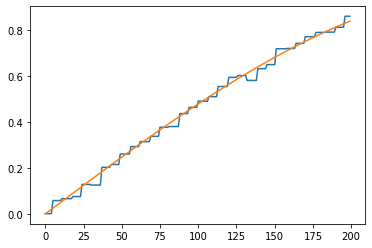

In [4]:
plt.plot(Y_hat)
plt.plot(Y_test_true)

## Ensemble

In [5]:
MSE_sum=0
repeat_time=20
ensemble_time=100
for seed in range(repeat_time):
    np.random.seed(seed)
    X_train= np.arange(0,1,0.001).reshape(-1,1)
    Y_train_true = np.sin(X_train).ravel()
    Y_train_noise = np.random.normal(scale=0.1,size=X_train.shape[0])
    Y_train=Y_train_true+Y_train_noise

    X_test= np.arange(0,1,0.005).reshape(-1,1)
    Y_test_true = np.sin(X_test).ravel()
    
    pre_vec=np.zeros(Y_test_true.shape[0])
    for ensemble_idx in range(ensemble_time):
    
    
        RT_model=RegressionTree(estimator="naive_estimator",splitter="midpoint",min_samples_split=30,max_depth=6,random_state=ensemble_idx)
        RT_model.fit(X_train,Y_train)
        pre_vec+=RT_model.predict(X_test)
    
    pre_vec/=ensemble_time
    MSE_sum+=MSE(pre_vec,Y_test_true)
MSE_sum/repeat_time

0.0005999437643960439

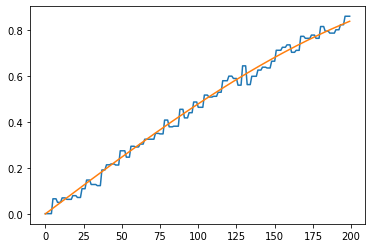

In [6]:
plt.plot(pre_vec)
plt.plot(Y_test_true)

In [7]:
ERT_model=RegressionTree(estimator="extrapolation_estimator",
                         splitter="midpoint",
                         min_samples_split=30,
                         max_depth=4,
                         order=1,
                         random_state=1,
                         truncate_ratio_low=0.45,
                         truncate_ratio_up=0.8)
ERT_model.fit(X_train,Y_train)
Y_hat=ERT_model.predict(X_test)

#np.arange(0.0001,0.04,0.0005).reshape(-1,1)
MSE(Y_hat,Y_test_true)

0.0006658819683385687

In [8]:
MSE_sum=0
repeat_time=20
for seed in range(repeat_time):
    np.random.seed(seed)
    X_train= np.arange(0,1,0.001).reshape(-1,1)
    Y_train_true = np.sin(X_train).ravel()
    Y_train_noise = np.random.normal(scale=0.1,size=X_train.shape[0])
    Y_train=Y_train_true+Y_train_noise

    X_test= np.arange(0,1,0.005).reshape(-1,1)
    Y_test_true = np.sin(X_test).ravel()
    ERT_model=RegressionTree(estimator="extrapolation_estimator",
                         splitter="midpoint",
                         min_samples_split=30,
                         max_depth=4,
                         order=1,
                         random_state=1,
                         truncate_ratio_low=0.45,
                         truncate_ratio_up=0.8)
    ERT_model.fit(X_train,Y_train)
    Y_hat=ERT_model.predict(X_test)
    MSE_sum+=MSE(Y_hat,Y_test_true)
MSE_sum/repeat_time

0.0007298776424295655

In [9]:
node_range,dt_X, dt_Y,sorted_ratio,sorted_prediction,intercept= ERT_model.get_node_information(9)

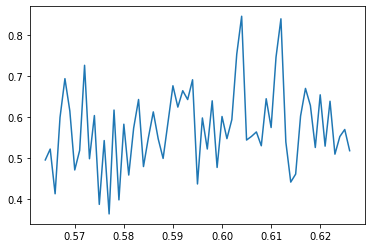

In [10]:
plt.plot(dt_X.ravel(),dt_Y.ravel())

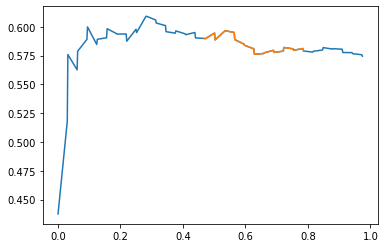

In [11]:
plt.plot(sorted_ratio,sorted_prediction)
plt.plot(sorted_ratio[int(len(sorted_ratio)*0.45):int(len(sorted_ratio)*0.8)],sorted_prediction[int(len(sorted_prediction)*0.45):int(len(sorted_prediction)*0.8)])


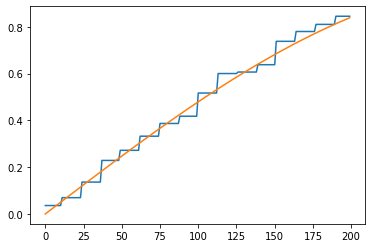

In [12]:
plt.plot(Y_hat)
plt.plot(Y_test_true)

# only index at center

In [13]:


def compute_MSE_node_central(model,func):
    X_test=model.tree_.node_range.mean(axis=1)
    X_test=np.array(X_test)
    Y_hat=model.predict(X_test)
    
    Y_true=func(X_test).ravel()

   
    return MSE(Y_hat,Y_true)
    

In [14]:
compute_MSE_node_central(ERT_model,np.sin)
compute_MSE_node_central(RT_model,np.sin)

0.0008487394025040297

0.00048705378442812395

In [15]:
## repeat experiment
error_RT=0
error_ERT=0
for seed in range(50):
    np.random.seed(seed)
    func=np.sin
    #X_train,pdf_X_train=density.generate(1000)
    X_train= np.arange(0,1,0.001).reshape(-1,1)
    Y_train_true = func(X_train).ravel()
    Y_train_noise = np.random.normal(scale=0.1,size=X_train.shape[0])
    Y_train=Y_train_true+Y_train_noise

    X_test= np.arange(0,1,0.005).reshape(-1,1)
    Y_test_true = func(X_test).ravel()
    min_samples_split=120
    max_depth=6
    RT_model=RegressionTree(estimator="naive_estimator",
                            splitter="midpoint",
                            min_samples_split=min_samples_split,
                            max_depth=max_depth,
                            random_state=1)
    RT_model.fit(X_train,Y_train)
    ERT_model=RegressionTree(estimator="extrapolation_estimator",
                             splitter="midpoint",
                             min_samples_split=min_samples_split,
                             max_depth=max_depth,
                             order=1,
                             random_state=1,
                             truncate_ratio_low=0.45,
                             truncate_ratio_up=0.8)
    ERT_model.fit(X_train,Y_train)
    
    error_RT+=compute_MSE_node_central(ERT_model,func)
    error_ERT+=compute_MSE_node_central(RT_model,func)

In [16]:
error_RT
error_ERT

0.04297188407679876

0.02617943566743878

# Pointwise Extrapolation Estimator

In [3]:
ERT_model=RegressionTree(estimator="pointwise_extrapolation_estimator",
                         splitter="midpoint",
                         min_samples_split=30,
                         max_depth=4,
                         order=1,
                         random_state=1,
                         truncate_ratio_low=0.45,
                         truncate_ratio_up=0.8)
ERT_model.fit(X_train,Y_train)
Y_hat=ERT_model.predict(X_test)

#np.arange(0.0001,0.04,0.0005).reshape(-1,1)
MSE(Y_hat,Y_test_true)

0.0005780942929730944

In [18]:
MSE_sum=0
repeat_time=20
for seed in range(repeat_time):
    np.random.seed(seed)
    X_train= np.arange(0,1,0.001).reshape(-1,1)
    Y_train_true = np.sin(X_train).ravel()
    Y_train_noise = np.random.normal(scale=0.1,size=X_train.shape[0])
    Y_train=Y_train_true+Y_train_noise

    X_test= np.arange(0,1,0.005).reshape(-1,1)
    Y_test_true = np.sin(X_test).ravel()
    ERT_model=RegressionTree(estimator="pointwise_extrapolation_estimator",
                         splitter="midpoint",
                         min_samples_split=30,
                         max_depth=3,
                         order=1,
                         random_state=1,
                         truncate_ratio_low=0.3,
                         truncate_ratio_up=0.7)
    ERT_model.fit(X_train,Y_train)
    Y_hat=ERT_model.predict(X_test)
    MSE_sum+=MSE(Y_hat,Y_test_true)
MSE_sum/repeat_time

0.00032587283371684215

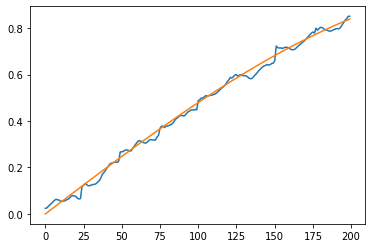

In [19]:
plt.plot(Y_hat)
plt.plot(Y_test_true)

## Numba Acceleration

In [4]:
ERT_model=RegressionTree(estimator="pointwise_extrapolation_estimator",
                         splitter="midpoint",
                         min_samples_split=30,
                         max_depth=4,
                         order=1,
                         random_state=1,
                         truncate_ratio_low=0.45,
                         truncate_ratio_up=0.8,
                        numba_acc=1)
ERT_model.fit(X_train,Y_train)
Y_hat=ERT_model.predict(X_test)

#np.arange(0.0001,0.04,0.0005).reshape(-1,1)
MSE(Y_hat,Y_test_true)

0.0005857000985224981

In [5]:
MSE_sum=0
repeat_time=20
for seed in range(repeat_time):
    np.random.seed(seed)
    X_train= np.arange(0,1,0.001).reshape(-1,1)
    Y_train_true = np.sin(X_train).ravel()
    Y_train_noise = np.random.normal(scale=0.1,size=X_train.shape[0])
    Y_train=Y_train_true+Y_train_noise

    X_test= np.arange(0,1,0.005).reshape(-1,1)
    Y_test_true = np.sin(X_test).ravel()
    ERT_model=RegressionTree(estimator="pointwise_extrapolation_estimator",
                         splitter="midpoint",
                         min_samples_split=30,
                         max_depth=3,
                         order=1,
                         random_state=1,
                         truncate_ratio_low=0.3,
                         truncate_ratio_up=0.7,
                            numba_acc=1)
    ERT_model.fit(X_train,Y_train)
    Y_hat=ERT_model.predict(X_test)
    MSE_sum+=MSE(Y_hat,Y_test_true)
MSE_sum/repeat_time

0.00032789852982466

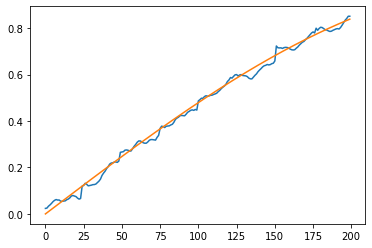

In [6]:
plt.plot(Y_hat)
plt.plot(Y_test_true)

In [9]:
time_s=time()
MSE_sum=0
repeat_time=10
for seed in range(repeat_time):
    np.random.seed(seed)
    X_train= np.arange(0,1,0.0002).reshape(-1,1)
    Y_train_true = np.sin(X_train).ravel()
    Y_train_noise = np.random.normal(scale=0.1,size=X_train.shape[0])
    Y_train=Y_train_true+Y_train_noise

    X_test= np.arange(0,1,0.0005).reshape(-1,1)
    Y_test_true = np.sin(X_test).ravel()
    ERT_model=RegressionTree(estimator="pointwise_extrapolation_estimator",
                         splitter="midpoint",
                         min_samples_split=30,
                         max_depth=3,
                         order=1,
                         random_state=1,
                         truncate_ratio_low=0.3,
                         truncate_ratio_up=0.7,
                         numba_acc=1)
    ERT_model.fit(X_train,Y_train)
    Y_hat=ERT_model.predict(X_test)
    MSE_sum+=MSE(Y_hat,Y_test_true)
MSE_sum/repeat_time
time_e=time()
print("time used : {} s".format(time_e-time_s))

time_s=time()
MSE_sum=0

for seed in range(repeat_time):
    np.random.seed(seed)
    X_train= np.arange(0,1,0.0002).reshape(-1,1)
    Y_train_true = np.sin(X_train).ravel()
    Y_train_noise = np.random.normal(scale=0.1,size=X_train.shape[0])
    Y_train=Y_train_true+Y_train_noise

    X_test= np.arange(0,1,0.0005).reshape(-1,1)
    Y_test_true = np.sin(X_test).ravel()
    ERT_model=RegressionTree(estimator="pointwise_extrapolation_estimator",
                         splitter="midpoint",
                         min_samples_split=30,
                         max_depth=3,
                         order=1,
                         random_state=1,
                         truncate_ratio_low=0.3,
                         truncate_ratio_up=0.7,
                         numba_acc=0)
    ERT_model.fit(X_train,Y_train)
    Y_hat=ERT_model.predict(X_test)
    MSE_sum+=MSE(Y_hat,Y_test_true)
MSE_sum/repeat_time
time_e=time()
print("time used : {} s".format(time_e-time_s))

0.00012897028906758802

time used : 6.945038557052612 s


0.0001289702890675881

time used : 188.4778401851654 s


## Parallel Computation

In [3]:
ERT_model=RegressionTree(estimator="pointwise_extrapolation_estimator",
                         splitter="midpoint",
                         min_samples_split=30,
                         max_depth=4,
                         order=1,
                         random_state=1,
                         truncate_ratio_low=0.45,
                         truncate_ratio_up=0.8,
                        parallel_jobs=1)
ERT_model.fit(X_train,Y_train)
Y_hat=ERT_model.predict(X_test)

#np.arange(0.0001,0.04,0.0005).reshape(-1,1)
MSE(Y_hat,Y_test_true)

0.0005857000985224998

In [5]:
from time import time

In [7]:
time_s=time()
MSE_sum=0
repeat_time=20
for seed in range(repeat_time):
    np.random.seed(seed)
    X_train= np.arange(0,1,0.0002).reshape(-1,1)
    Y_train_true = np.sin(X_train).ravel()
    Y_train_noise = np.random.normal(scale=0.1,size=X_train.shape[0])
    Y_train=Y_train_true+Y_train_noise

    X_test= np.arange(0,1,0.0005).reshape(-1,1)
    Y_test_true = np.sin(X_test).ravel()
    ERT_model=RegressionTree(estimator="pointwise_extrapolation_estimator",
                         splitter="midpoint",
                         min_samples_split=30,
                         max_depth=3,
                         order=1,
                         random_state=1,
                         truncate_ratio_low=0.3,
                         truncate_ratio_up=0.7,
                         parallel_jobs=8)
    ERT_model.fit(X_train,Y_train)
    Y_hat=ERT_model.predict(X_test)
    MSE_sum+=MSE(Y_hat,Y_test_true)
MSE_sum/repeat_time
time_e=time()
print("time used : {} s".format(time_e-time_s))

time_s=time()
MSE_sum=0
repeat_time=20
for seed in range(repeat_time):
    np.random.seed(seed)
    X_train= np.arange(0,1,0.0002).reshape(-1,1)
    Y_train_true = np.sin(X_train).ravel()
    Y_train_noise = np.random.normal(scale=0.1,size=X_train.shape[0])
    Y_train=Y_train_true+Y_train_noise

    X_test= np.arange(0,1,0.0005).reshape(-1,1)
    Y_test_true = np.sin(X_test).ravel()
    ERT_model=RegressionTree(estimator="pointwise_extrapolation_estimator",
                         splitter="midpoint",
                         min_samples_split=30,
                         max_depth=3,
                         order=1,
                         random_state=1,
                         truncate_ratio_low=0.3,
                         truncate_ratio_up=0.7,
                         parallel_jobs=0)
    ERT_model.fit(X_train,Y_train)
    Y_hat=ERT_model.predict(X_test)
    MSE_sum+=MSE(Y_hat,Y_test_true)
MSE_sum/repeat_time
time_e=time()
print("time used : {} s".format(time_e-time_s))

0.00012188304213675589

time used : 57.92785716056824 s


0.00012188304213675589

time used : 409.89631700515747 s


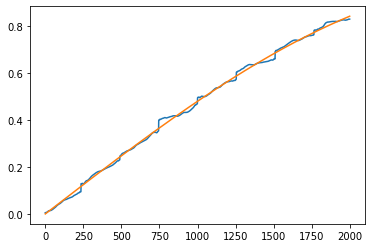

In [8]:
plt.plot(Y_hat)
plt.plot(Y_test_true)

## Illustration of speeding up

In [11]:
time_s=time()
MSE_sum=0
repeat_time=20
for seed in range(repeat_time):
    np.random.seed(seed)
    X_train= np.arange(0,1,0.0002).reshape(-1,1)
    Y_train_true = np.sin(X_train).ravel()
    Y_train_noise = np.random.normal(scale=0.1,size=X_train.shape[0])
    Y_train=Y_train_true+Y_train_noise

    X_test= np.arange(0,1,0.0002).reshape(-1,1)
    Y_test_true = np.sin(X_test).ravel()
    ERT_model=RegressionTree(estimator="pointwise_extrapolation_estimator",
                         splitter="midpoint",
                         min_samples_split=30,
                         max_depth=3,
                         order=1,
                         random_state=1,
                         truncate_ratio_low=0.3,
                         truncate_ratio_up=0.7,
                         parallel_jobs=8,
                         numba_acc=1)
    ERT_model.fit(X_train,Y_train)
    Y_hat=ERT_model.predict(X_test)
    MSE_sum+=MSE(Y_hat,Y_test_true)
MSE_sum/repeat_time
time_e=time()
print("time used : {} s".format(time_e-time_s))

time_s=time()
MSE_sum=0
repeat_time=10
for seed in range(repeat_time):
    np.random.seed(seed)
    X_train= np.arange(0,1,0.0002).reshape(-1,1)
    Y_train_true = np.sin(X_train).ravel()
    Y_train_noise = np.random.normal(scale=0.1,size=X_train.shape[0])
    Y_train=Y_train_true+Y_train_noise

    X_test= np.arange(0,1,0.0002).reshape(-1,1)
    Y_test_true = np.sin(X_test).ravel()
    ERT_model=RegressionTree(estimator="pointwise_extrapolation_estimator",
                         splitter="midpoint",
                         min_samples_split=30,
                         max_depth=3,
                         order=1,
                         random_state=1,
                         truncate_ratio_low=0.3,
                         truncate_ratio_up=0.7)
    ERT_model.fit(X_train,Y_train)
    Y_hat=ERT_model.predict(X_test)
    MSE_sum+=MSE(Y_hat,Y_test_true)
MSE_sum/repeat_time
time_e=time()
print("time used : {} s".format(time_e-time_s))

0.00012186564956195663

time used : 7.78571081161499 s


0.0001289837648677502

time used : 469.0719516277313 s


## Grid Search CV

In [1]:
from distribution import TestDistribution

from RTER import RegressionTree

import numpy as np

from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

from time import time
import os



distribution_index_vec=[1,2,3,4]
repeat_time=2


log_file_dir = "./results/accuracy/"


for distribution_iter,distribution_index in enumerate(distribution_index_vec):

    for iterate in range(repeat_time):


        
        np.random.seed(iterate)
        # generate distribution


        sample_generator=TestDistribution(distribution_index).returnDistribution()
        n_test, n_train = 2000,100
        X_train, Y_train = sample_generator.generate(n_train)
        X_test, Y_test = sample_generator.generate_true(n_test)
        
        print(Y_test[:5])

        '''
        # RTER
        time_start=time()
        #parameters={"C":[i for i in np.logspace(-1.5,1.5,15)]}
        #cv_model_AWNN=GridSearchCV(estimator=AWNN(),param_grid=parameters,n_jobs=-1,cv=10)
        #cv_model_AWNN.fit(X_train)
        RTER_model=RegressionTree(estimator="pointwise_extrapolation_estimator",
                         splitter="midpoint",
                         min_samples_split=30,
                         max_depth=3,
                         random_state=iterate,
                         truncate_ratio_low=0.3,
                         truncate_ratio_up=0.7)
        RTER_model.fit(X_train,Y_train)
        Y_hat=RTER_model.predict(X_test)
        
        time_end=time()
        
        log_file_name = "{}.csv".format("RTER")
        log_file_path = os.path.join(log_file_dir, log_file_name)
        
        with open(log_file_path, "a") as f:
            logs= "{},{},{},{},{},{}\n".format(distribution_index,
                                          MSE(Y_hat,Y_test), time_end-time_start,
                                          iterate,n_train,n_test)
            f.writelines(logs)

            '''
        
        
        # RTER with cv
        time_start=time()
        parameters={"truncate_ratio_low":[0.1,0.2,0.3 ], "truncate_ratio_up":[0.7,0.8 ]}
        cv_model_RTER=GridSearchCV(estimator=RegressionTree(min_samples_split=30, max_depth=3,parallel_jobs=0),param_grid=parameters, cv=3, n_jobs=18)
        cv_model_RTER.fit(X_train, Y_train)
        
        RTER_model = cv_model_RTER.best_estimator_
        mse_score=RTER_model.score(X_test, Y_test)
        
        time_end=time()
        
            
            
    

        print(RTER_model.predict(X_test)[:5])
            
        
        # GBRT
        time_start=time()
        
        model_GBRT = GradientBoostingRegressor(n_estimators = 3000)
        model_GBRT.fit(X_train, Y_train)
        
        y_hat=model_GBRT.predict(X_test)
        mse_score = MSE(y_hat, Y_test)
        
        time_end=time()
        
        log_file_name = "{}.csv".format("GBRT")
        log_file_path = os.path.join(log_file_dir, log_file_name)
        
        with open(log_file_path, "a") as f:
            logs= "{},{},{},{},{},{}\n".format(distribution_index,
                                          mse_score, time_end-time_start,
                                          iterate,n_train,n_test)
            f.writelines(logs)
            
            

        print(y_hat[:5])
            
            
            
        # GBRT
        time_start=time()
        
        model_RFR = RandomForestRegressor(n_estimators = 200)
        model_RFR.fit(X_train, Y_train.ravel())
        
        y_hat=model_RFR.predict(X_test)
        mse_score = MSE(y_hat, Y_test)
        
        time_end=time()
        
        log_file_name = "{}.csv".format("RFR")
        log_file_path = os.path.join(log_file_dir, log_file_name)
        
        with open(log_file_path, "a") as f:
            logs= "{},{},{},{},{},{}\n".format(distribution_index,
                                          mse_score, time_end-time_start,
                                          iterate,n_train,n_test)
            f.writelines(logs)
            

        print(y_hat[:5])
        
        
        
        print("next round")

[-0.30175238  0.52271606 -0.76605285 -0.79649351 -0.26807948]
[-0.43206467  0.89650581 -0.8714098  -0.52312021 -0.42224491]
[ 0.2125366   1.39678708 -2.29401044  0.95009155  0.2125366 ]
[ 0.30351329  1.02174107 -1.57997358  0.68171167  0.28704152]
next round
[-0.16029248  0.24598173 -0.07086512  0.60966372  0.34421057]
[0.67779025 0.92164654 0.63609335 0.74625199 0.89910354]
[-0.11495517  0.91101741 -0.11495517  1.2797496   0.57750478]
[-0.13309813  0.89764653 -0.05381201  1.09882079  0.34502823]
next round
[ 9.03680267  8.18913612  9.91424578 11.16152974  6.63403352]


KeyboardInterrupt: 

## Test Distribution Visualization

In [2]:
from RTER import RegressionTree
from distribution import TestDistribution
import numpy as np


from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from time import time


In [17]:
generator=TestDistribution(6,dim=6).returnDistribution()
np.random.seed(2)
X_train,Y_train=generator.generate(1000)
X_test,Y_test=generator.generate(1000)

order=1
truncate_ratio_low, truncate_ratio_up =0,1
r_range_low, r_range_up =0.1,0.8

In [4]:
## difference between training error and test error
ERT_model=RegressionTree(estimator="extrapolation_estimator",
                         splitter="maxedge",
                         min_samples_split=10,
                         max_depth=3,
                         order=0,
                         random_state=4,
                         truncate_ratio_low=truncate_ratio_low,
                         truncate_ratio_up=truncate_ratio_up,
                        polynomial_output=0)
ERT_model.fit(X_train,Y_train)
Y_hat=ERT_model.predict(X_test)

#np.arange(0.0001,0.04,0.0005).reshape(-1,1)
MSE(Y_hat,Y_test)

1.0968805302263445

In [21]:
## difference between training error and test error
ERT_model=RegressionTree(estimator="pointwise_extrapolation_estimator",
                         splitter="maxedge",
                         min_samples_split=10,
                         max_depth=3,
                         order=1,
                         random_state=4,
                         truncate_ratio_low=truncate_ratio_low,
                         truncate_ratio_up=truncate_ratio_up,
                        r_range_low=r_range_low,
                        r_range_up=r_range_up)
ERT_model.fit(X_train,Y_train)
Y_hat=ERT_model.predict(X_test)

#np.arange(0.0001,0.04,0.0005).reshape(-1,1)
MSE(Y_hat,Y_test)

3.652676290830161

In [115]:
((Y_hat-Y_test)**2<10000).mean()

0.851

In [22]:
from sklearn.ensemble import GradientBoostingRegressor


model_GBRT = GradientBoostingRegressor(n_estimators = 3000)

model_GBRT.fit(X_train, Y_train.ravel())
y_hat=model_GBRT.predict(X_test)
mse_score = MSE(y_hat, Y_test)
mse_score

GradientBoostingRegressor(n_estimators=3000)

1.457071398307025

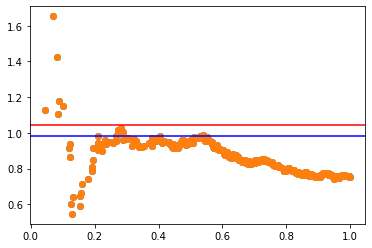

In [27]:
node_idx=1
query_obj=list(ERT_model.tree_.leafnode_fun.values())[node_idx]
X_range,dt_X, dt_Y = query_obj.X_range, query_obj.dt_X, query_obj.dt_Y
np.random.seed(4)
X_extra= np.random.rand(dt_X.shape[1])*(X_range[1]-X_range[0])+X_range[0]
sorted_ratio, sorted_prediction, intercept = ERT_model.get_node_extrapolation(dt_X, dt_Y, X_extra, X_range, order, truncate_ratio_low, truncate_ratio_up)
plt.scatter((sorted_ratio),sorted_prediction)
plt.scatter((sorted_ratio)[int(len(sorted_ratio)*truncate_ratio_low):int(len(sorted_ratio)*truncate_ratio_up)],sorted_prediction[int(len(sorted_prediction)*truncate_ratio_low):int(len(sorted_prediction)*truncate_ratio_up)])
plt.axhline(intercept,color="red")
plt.axhline(generator.evaluate(X_extra.reshape(1,-1)),color="blue")

In [19]:
X_extra

array([0.01037415, 0.7509373 , 0.24788665, 0.06691476])

NameError: name 'pt_idx' is not defined

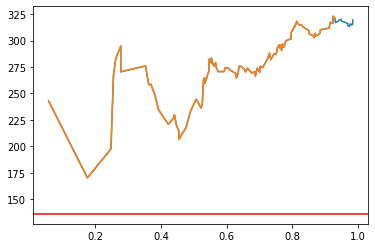

In [22]:
plt.plot((sorted_ratio)**2,sorted_prediction)
plt.plot((sorted_ratio**2)[int(len(sorted_ratio)*truncate_ratio_low):int(len(sorted_ratio)*truncate_ratio_up)],sorted_prediction[int(len(sorted_prediction)*truncate_ratio_low):int(len(sorted_prediction)*truncate_ratio_up)])
plt.axhline(intercept,color="red")
plt.axhline(generator.evaluate(dt_X[pt_idx].reshape(1,-1)),color="blue")

In [30]:
generator.evaluate(dt_X[pt_idx].reshape(1,-1))
sorted_prediction

array([267.89584165])

array([[269.55263095],
       [282.80979441],
       [255.49843134],
       [227.68029847],
       [251.39782463],
       [270.75474259],
       [271.41506463],
       [262.79172729],
       [268.59424407],
       [266.96595136],
       [266.59202445],
       [254.73436474],
       [268.57879782],
       [258.34933706],
       [261.57079588],
       [280.12711994],
       [292.15522939],
       [301.7356819 ],
       [312.38390159],
       [325.94439231],
       [329.35222491],
       [325.42892986],
       [319.08132134],
       [310.20560461],
       [314.87358835],
       [314.89686941],
       [313.28253323],
       [304.97111404],
       [316.46102939],
       [309.61589967],
       [302.76613912],
       [296.91679921],
       [296.59096626],
       [289.84969648],
       [286.42195832],
       [281.1311876 ],
       [280.08634101],
       [285.18751761],
       [295.63595536],
       [292.20200432],
       [288.17398532],
       [291.28431631],
       [296.87986546],
       [301

In [140]:
np.arange(0,1,0.01)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [147]:
X_train

array([[0.4359949 , 0.02592623, 0.54966248, 0.43532239],
       [0.4203678 , 0.33033482, 0.20464863, 0.61927097],
       [0.29965467, 0.26682728, 0.62113383, 0.52914209],
       ...,
       [0.86404009, 0.80425123, 0.47328984, 0.24445471],
       [0.27909377, 0.28281627, 0.07434967, 0.71845122],
       [0.80382961, 0.95072586, 0.71119427, 0.07558805]])

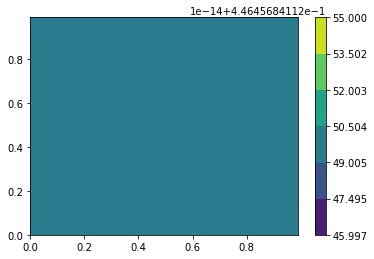

In [20]:
generator=TestDistribution(6).returnDistribution()
np.random.seed(3)
X_train,Y_train=generator.generate(1000)
axis0,axis1 = np.meshgrid(np.arange(0,1,0.01),np.arange(0,1,0.01))
X_grid = np.array([axis0.ravel(),axis1.ravel()]).T
model = RegressionTree(estimator="extrapolation_estimator",
                         splitter="maxedge",
                         min_samples_split=30,
                         max_depth=0,
                         order=1,
                         random_state=4,
                         truncate_ratio_low= 0.1,
                         truncate_ratio_up= 0.98)
model.fit(X_train, Y_train)
predict_result=model.predict(X_grid).reshape(-1,100)
plt.contourf(axis0, axis1,predict_result) #,vmin=0,vmax=20)
plt.colorbar()

In [21]:
np.mean((model.predict(X_grid)-np.mean(X_grid,axis=1))**2)

0.04401893827370889

In [134]:
from sklearn.ensemble import GradientBoostingRegressor


model_GBRT = GradientBoostingRegressor(n_estimators = 2)

model_GBRT.fit(X_train, Y_train.ravel())
y_hat=model_GBRT.predict(X_grid)
mse_score = MSE(y_hat, np.mean(X_grid,axis=1))
mse_score

GradientBoostingRegressor(n_estimators=2)

0.025783427170873726

In [135]:
y_hat

array([0.4433212, 0.4433212, 0.4433212, ..., 0.6214448, 0.6214448,
       0.6214448])

In [136]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
model_RFR = RandomForestRegressor(n_estimators =50)
model_RFR.fit(X_train, Y_train.ravel())

y_hat=model_RFR.predict(X_grid)
mse_score = MSE(y_hat, np.mean(X_grid,axis=1))
mse_score

RandomForestRegressor(n_estimators=50)

0.18938189221372156

In [137]:
y_hat

array([0.32563808, 0.33681732, 0.31254277, ..., 0.38443486, 0.28584445,
       0.28916577])

In [143]:
node_check=list(model.tree_.leafnode_fun.values())[7]

In [144]:
node_check.X_range
node_check.dt_Y.mean()
node_check.y_hat

array([[0.875],
       [1.   ]])

0.8522618156294915

0.9922856925244213

In [145]:
node_check.sorted_ratio.shape

(122,)

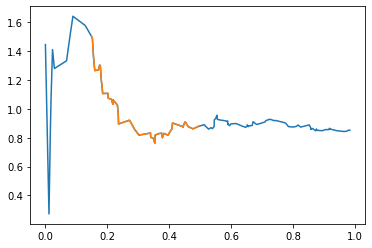

In [146]:
plt.plot(node_check.sorted_ratio,node_check.sorted_prediction)
plt.plot(node_check.sorted_ratio[10:55],node_check.sorted_prediction[10:55])

## Stability

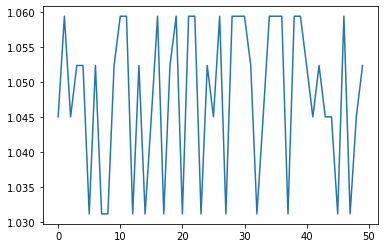

In [6]:
MSE_vec=[]
repeat_time=50
generator=TestDistribution(4).returnDistribution()
for seed in range(repeat_time):
    np.random.seed(1)
    X_train, Y_train = generator.generate(1000)
    X_test, Y_test = generator.generate(1000)
    

    ERT_model=RegressionTree(estimator="pointwise_extrapolation_estimator",
                         splitter="midpoint",
                         min_samples_split=30,
                         max_depth=1,
                         order=1,
                         random_state=seed,
                         truncate_ratio_low=0.3,
                         truncate_ratio_up=0.8)
    ERT_model.fit(X_train,Y_train)
    Y_hat=ERT_model.predict(X_test)
    MSE_vec.append(MSE(Y_hat,Y_test))

plt.plot(MSE_vec)

In [166]:
np.max([1,2,3,3])

3

In [170]:
x=np.array([1,2,3,3])


array([2, 3])

In [173]:
np.random.choice(np.where(x==x.max())[0])

3

## check high dimension

In [1]:
from RTER import RegressionTree
from distribution import TestDistribution
import numpy as np


from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from time import time


In [2]:
generator=TestDistribution(6,dim=2).returnDistribution()
np.random.seed(2)
X_train,Y_train=generator.generate(1000)
X_test,Y_test=generator.generate(1000)

max_depth=3
order=1
truncate_ratio_low, truncate_ratio_up =0.00, 1

In [3]:
## difference between training error and test error
ERT_model=RegressionTree(estimator="pointwise_extrapolation_estimator",
                         splitter="maxedge",
                         min_samples_split=30,
                         max_depth=max_depth,
                         order=order,
                         random_state=4,
                         truncate_ratio_low=truncate_ratio_low,
                         truncate_ratio_up=truncate_ratio_up)
ERT_model.fit(X_train,Y_train)
Y_hat=ERT_model.predict(X_test)

#np.arange(0.0001,0.04,0.0005).reshape(-1,1)
MSE(Y_hat,Y_test)

1.056755188870076

In [4]:
from sklearn.ensemble import GradientBoostingRegressor


model_GBRT = GradientBoostingRegressor(n_estimators = 3000)

model_GBRT.fit(X_train, Y_train.ravel())
y_hat=model_GBRT.predict(X_test)
mse_score = MSE(y_hat, Y_test)
mse_score

GradientBoostingRegressor(n_estimators=3000)

1.50393145835833

array([[0.  ],
       [0.25]])

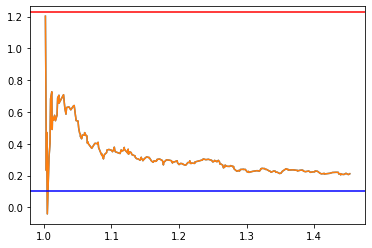

In [18]:
node_idx=0
query_obj=list(ERT_model.tree_.leafnode_fun.values())[node_idx]
X_range,dt_X, dt_Y = query_obj.X_range, query_obj.dt_X, query_obj.dt_Y
X_range
X_extra= np.array([0.1,0.8])
sorted_ratio, sorted_prediction, intercept = ERT_model.get_node_extrapolation(dt_X, dt_Y, X_extra, X_range, order, truncate_ratio_low, truncate_ratio_up)
_=plt.plot((sorted_ratio),sorted_prediction)
_=plt.plot((sorted_ratio)[int(len(sorted_ratio)*truncate_ratio_low):int(len(sorted_ratio)*truncate_ratio_up)],sorted_prediction[int(len(sorted_prediction)*truncate_ratio_low):int(len(sorted_prediction)*truncate_ratio_up)])
_=plt.axhline(intercept,color="red")
_=plt.axhline(generator.evaluate(X_extra.reshape(1,-1)),color="blue")

In [1]:
from RTER import RegressionTree
from distribution import TestDistribution
import numpy as np


from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from time import time


In [8]:
generator=TestDistribution(6,dim=2).returnDistribution()
np.random.seed(2)
X_train,Y_train=generator.generate(1000)
X_test,Y_test=generator.generate(1000)

X_train = X_train[:,0].reshape(-1,1)
X_test = X_test[:,0].reshape(-1,1)

max_depth=5
order=1
truncate_ratio_low, truncate_ratio_up =0.00, 1
r_range_low, r_range_up = 0,0.6

In [9]:
## difference between training error and test error
ERT_model=RegressionTree(estimator="pointwise_extrapolation_estimator",
                         splitter="maxedge",
                         min_samples_split=30,
                         max_depth=max_depth,
                         order=order,
                         random_state=4,
                         truncate_ratio_low=truncate_ratio_low,
                         truncate_ratio_up=truncate_ratio_up,
                        r_range_up=r_range_up,
                        r_range_low=r_range_low)
ERT_model.fit(X_train,Y_train)
Y_hat=ERT_model.predict(X_test)

#np.arange(0.0001,0.04,0.0005).reshape(-1,1)
MSE(Y_hat,Y_test)

1.3287102958212644

In [11]:
from sklearn.ensemble import GradientBoostingRegressor


model_GBRT = GradientBoostingRegressor(n_estimators = 200)

model_GBRT.fit(X_train, Y_train.ravel())
y_hat=model_GBRT.predict(X_test)
mse_score = MSE(y_hat, Y_test)
mse_score

GradientBoostingRegressor(n_estimators=200)

1.0549299369461365

array([[0.  ],
       [0.25]])

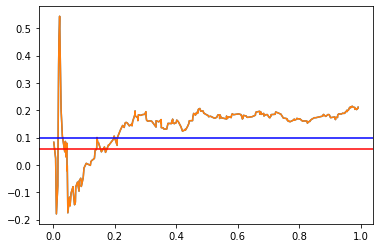

In [12]:
node_idx=0
query_obj=list(ERT_model.tree_.leafnode_fun.values())[node_idx]
X_range,dt_X, dt_Y = query_obj.X_range, query_obj.dt_X, query_obj.dt_Y
X_range
X_extra= np.array([0.1])
sorted_ratio, sorted_prediction, intercept = ERT_model.get_node_extrapolation(dt_X, dt_Y, X_extra, X_range, order, truncate_ratio_low, truncate_ratio_up)
_=plt.plot((sorted_ratio),sorted_prediction)
_=plt.plot((sorted_ratio)[int(len(sorted_ratio)*truncate_ratio_low):int(len(sorted_ratio)*truncate_ratio_up)],sorted_prediction[int(len(sorted_prediction)*truncate_ratio_low):int(len(sorted_prediction)*truncate_ratio_up)])
_=plt.axhline(intercept,color="red")
_=plt.axhline(generator.evaluate(X_extra.reshape(1,-1)),color="blue")

In [1]:
from RTER import RegressionTree
from distribution import TestDistribution
import numpy as np


from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from time import time


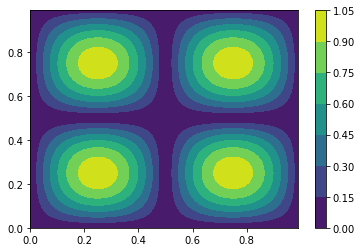

In [2]:
generator=TestDistribution(7,dim=2).returnDistribution()
np.random.seed(3)

axis0,axis1 = np.meshgrid(np.arange(0,1,0.01),np.arange(0,1,0.01))
X_grid = np.array([axis0.ravel(),axis1.ravel()]).T

predict_result=generator.evaluate(X_grid).reshape(-1,100)
plt.contourf(axis0, axis1,predict_result) #,vmin=0,vmax=20)
plt.colorbar()

0.11392819896027015

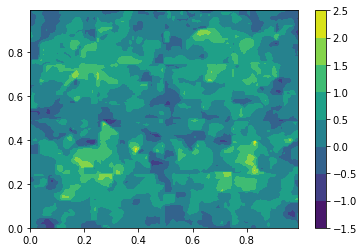

In [3]:
generator=TestDistribution(7).returnDistribution()
np.random.seed(1)
X_train,Y_train=generator.generate(1000)
X_test,Y_test = generator.generate_true(1000)
axis0,axis1 = np.meshgrid(np.arange(0,1,0.01),np.arange(0,1,0.01))
X_grid = np.array([axis0.ravel(),axis1.ravel()]).T
model = RegressionTree(estimator="pointwise_extrapolation_estimator",
                         splitter="maxedge",
                         min_samples_split=10,
                         max_depth=4,
                         order=1,
                         random_state=4,
                         truncate_ratio_low= 0,
                         truncate_ratio_up= 0.2,
                      r_range_low=0,
                      r_range_up=1)
model.fit(X_train, Y_train)
predict_result=model.predict(X_grid).reshape(-1,100)
plt.contourf(axis0, axis1,predict_result) #,vmin=0,vmax=20)
plt.colorbar()
MSE(model.predict(X_grid),generator.evaluate(X_grid))

In [8]:
generator=TestDistribution(7).returnDistribution()
np.random.seed(1)
X_train,Y_train=generator.generate(1000)
X_test,Y_test = generator.generate(10000)

model = RegressionTree(estimator="pointwise_extrapolation_estimator",
                         splitter="maxedge",
                         min_samples_split=10,
                         max_depth=4,
                         order=1,
                         random_state=4,
                         truncate_ratio_low= 0,
                         truncate_ratio_up= 0.2,
                      r_range_low=0,
                      r_range_up=1)
model.fit(X_train, Y_train)
y_hat=model.predict(X_test)

MSE(y_hat, Y_test)

0.21198559844841847

array([[0.  , 0.25],
       [0.25, 0.5 ]])

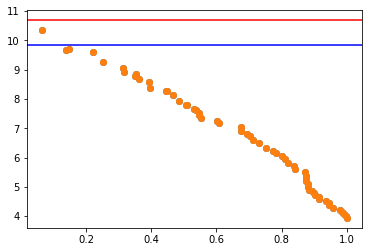

In [6]:
node_idx=1
ERT_model=model
query_obj=list(ERT_model.tree_.leafnode_fun.values())[node_idx]
X_range,dt_X, dt_Y = query_obj.X_range, query_obj.dt_X, query_obj.dt_Y
X_range
X_extra= X_range.mean(axis=0)+0.01
order, truncate_ratio_low, truncate_ratio_up , r_range_low, r_range_up= 1,0,1,0,0.7

sorted_ratio, sorted_prediction, intercept = ERT_model.get_node_extrapolation(dt_X, dt_Y, X_extra, X_range, order, truncate_ratio_low, truncate_ratio_up,r_range_low, r_range_up)
_=plt.scatter((sorted_ratio),sorted_prediction)
_=plt.scatter((sorted_ratio)[int(len(sorted_ratio)*truncate_ratio_low):int(len(sorted_ratio)*truncate_ratio_up)],sorted_prediction[int(len(sorted_prediction)*truncate_ratio_low):int(len(sorted_prediction)*truncate_ratio_up)])
_=plt.axhline(intercept,color="red")
_=plt.axhline(generator.evaluate(X_extra.reshape(1,-1)),color="blue")